In [4]:
import json
from collections import Counter
import matplotlib.pyplot as plt

In [5]:
def count_sdg_classes(json_file):
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)
    
    sdg_labels = data["sdg_order"]
    results = data["results"]
    
    class_counts = Counter()
    
    for result in results:
        binary_vector = result["binary_vector"]
        for i, value in enumerate(binary_vector):
            if value == 1:
                class_counts[sdg_labels[i]] += 1
    
    return class_counts

In [6]:
def plot_sdg_counts(class_counts):
    # Sort items in descending order by value
    sorted_items = sorted(class_counts.items(), key=lambda kv: kv[1], reverse=True)
    labels, values = zip(*sorted_items)
    
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel("Catégories SDG")
    plt.ylabel("Nombre d'occurrences")
    plt.title("Répartition des catégories SDG comptabilisées")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


Bonne santé et bien-être: 5
Travail décent et croissance économique: 15
Inégalités réduites: 11
Paix, justice et institutions efficaces: 23
Industrie, innovation et infrastructure: 28
Partenariats pour la réalisation des objectifs: 20
Consommation et production responsables: 43
Vie terrestre: 29
Eau propre et assainissement: 19
Énergie propre et d'un coût abordable: 24
Vie aquatique: 27
Faim zéro: 3
Éducation de qualité: 11
Pas de pauvreté: 2
Villes et communautés durables: 7
Mesures relatives à la lutte contre les changements climatiques: 5
Égalité entre les sexes: 1


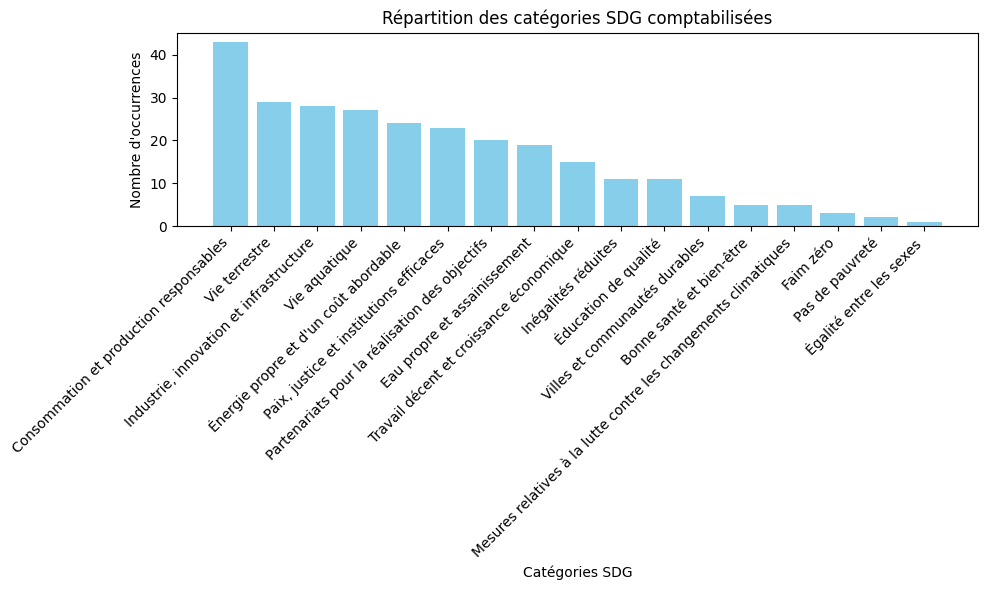

In [7]:

if __name__ == "__main__":
    json_file = "results_api.json" 
    counts = count_sdg_classes(json_file)
    
    for label, count in counts.items():
        print(f"{label}: {count}")
    
    plot_sdg_counts(counts)